# Ask all kepler EB questions for HAT DEB dataset

In [1]:
! head -n12 ../doc/170127_Kepler_CBPs

Fri 27 Jan 2017 09:26:55 AM EST

QUESTIONS
1. How many detached EBs are in the Kirk+ EB catalog (e.g., re-generate that
distribution from the Martin Fabrycky Mazeh paper)?
2. With what period distribution?
3. With what observing baseline?
--------------------
Repeat above questions for what's looking like the HATN EB catalog.



%load ../../hat/src/04_make_DEB_catalog.py

In [1]:
# %load ../../hat/src/04_make_DEB_catalog.py
import os
import itertools
try:
    import cPickle as pickle
except:
    import pickle


def get_DEB_list():
    '''
    After looking at and flagging DEBs, get a list of them.
    '''

    with open('../../hat/src/04_DATA_processed_fields.txt') as f:
        fieldstrs = f.readlines()

    fieldstrs = [f.strip('\n') for f in fieldstrs]

    debpaths = []
    deblengths, debperiods = [], []
    weirdpaths = []
    allpaths = []
    for fieldstr in fieldstrs:
        cppath = '../../hat/data/CPs_cut/G'+fieldstr+'_20'
        pklpaths = [cppath+'/'+f for f in os.listdir(cppath) if f.endswith('.pkl')]
        allpaths.append(pklpaths)

        for pklpath in pklpaths:
            thislc = pickle.load(open(pklpath, 'rb'))
            if thislc['varinfo']['vartags'] == 'detached EB':
                debpaths.append(pklpath)
                deblengths.append(len(thislc['magseries']['times']))
                debperiods.append(thislc['varinfo']['varperiod'])
            elif thislc['varinfo']['vartags'] == 'weird variability':
                weirdpaths.append(pklpath)

        print('{:s} retrieved.'.format(fieldstr))

    allpaths = list(itertools.chain.from_iterable(allpaths))

    return debpaths, weirdpaths, allpaths, deblengths, debperiods


def print_list_summaries(debpaths, weirdpaths, allpaths):

    pathd = {'debs':debpaths, 'weirds':weirdpaths, 'all':allpaths}
    for k in pathd.keys():
        print('{:s}: length {:d}, fraction {:.3g}'.format(\
                k, len(pathd[k]), len(pathd[k])/len(pathd['all'])))

def get_DEB_ids(debpaths):
    '''
    Given debpaths, parse it into a list of dictionaries where each dictionary
    gets: hatid (str), pickle path (str), original LC path (for sigma clipping
    reversion).
    '''

debpaths, weirdpaths, allpaths, deblengths, debperiods = get_DEB_list()
print_list_summaries(debpaths, weirdpaths, allpaths)



088 retrieved.
081 retrieved.
133 retrieved.
248 retrieved.
115 retrieved.
199 retrieved.
160 retrieved.
389 retrieved.
247 retrieved.
311 retrieved.
242 retrieved.
133 retrieved.
160 retrieved.
218 retrieved.
169 retrieved.
159 retrieved.
132 retrieved.
215 retrieved.
216 retrieved.
093 retrieved.
all: length 6791, fraction 1
debs: length 1732, fraction 0.255
weirds: length 37, fraction 0.00545


In [2]:
from astropy.io import ascii
import numpy as np, matplotlib.pyplot as plt
%matplotlib notebook

(N.b. many of these hand-labelled "detached EBs" would be much better classified via locally linear embedding, to get a morphology parameter that will then give a fair comparison)

In [4]:
import pandas as pd
cbps = pd.read_csv('../data/all_kepler_cbps.csv', delimiter='|')
cbps = cbps.drop(0, axis=0)

In [5]:
cbps

,KIC,KOI,name,M_1,M_2,a_in,P_in,e_in,R_p,a_p,P_p,e_p,"\Delta I_p,in",a_crit,ref,reflink
1,12644769.0,1611,16,0.69,0.2,0.22,40.1,0.16,8.27,0.71,228.8,0.01,0.31,0.64,Doyle et al. (2011),http://www.sciencemag.org/cgi/doi/10.1126/scie...
2,8572936.0,2459,34,1.05,1.02,0.23,28,0.52,8.38,1.09,288.8,0.18,1.86,0.84,Welsh et al. (2012),http://www.nature.com/doifinder/10.1038/nature...
3,9837578.0,2937,35,0.89,0.81,0.18,20.7,0.14,7.99,0.6,131.4,0.04,1.07,0.5,Welsh et al. (2012),http://www.nature.com/doifinder/10.1038/nature...
4,6762829.0,1740,38,0.95,0.26,0.15,18.8,0.1,4.35,0.47,106,0.07,0.18,0.39,Orosz et al. (2012b),http://stacks.iop.org/0004-637X/758/i=2/a=87
5,10020423.0,"3154, 7273",47b,1.04,0.36,0.08,7.4,0.02,2.98,0.3,49.5,0.04,0.27,0.2,Orosz et al. (2012a),http://www.sciencemag.org/cgi/doi/10.1126/scie...
6,10020423.0,"3154, 7273",47d,1.04,0.36,0.08,7.4,0.02,NaN,0.72,187.3,NaN,NaN,0.2,Orosz et al. (2015),http://adsabs.harvard.edu/abs/2015ESS.....340201W
7,10020423.0,"3154, 7273",47c,1.04,0.36,0.08,7.4,0.02,4.61,0.99,303.1,<.41,1.16,0.2,Orosz et al. (2012a),http://www.sciencemag.org/cgi/doi/10.1126/scie...
8,4862625.0,6464,PH-1/64,1.5,0.4,0.18,20,0.21,6.18,0.65,138.5,0.07,2.81,0.54,"Schwamb et al. (2013), Kostov et al. (2013)",http://iopscience.iop.org/article/10.1088/0004...
9,12351927.0,7522,413,0.82,0.54,0.1,10.1,0.04,4.34,0.36,66.3,0.12,4.02,0.26,Kostov et al. (2014),http://iopscience.iop.org/article/10.1088/0004...
10,9632895.0,1451 (FP),3151,0.93,0.19,0.18,27.3,0.05,6.17,0.79,240.5,0.04,2.9,0.44,Welsh et al. (2015),http://iopscience.iop.org/article/10.1088/0004...


<IPython.core.display.Javascript object>


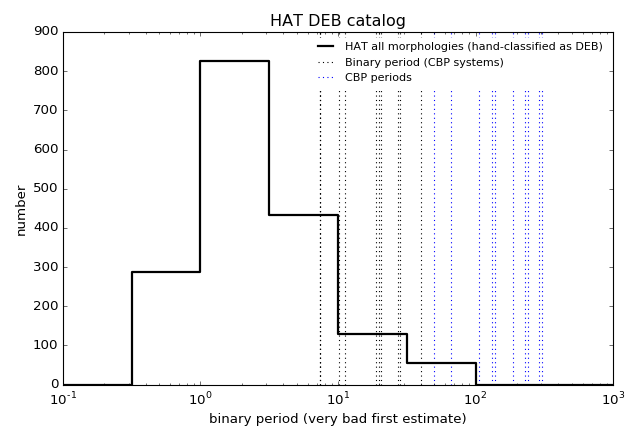

In [11]:
bins = np.logspace(-1,3,9)

allvals, binedge = np.histogram(debperiods, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='HAT all morphologies (hand-classified as DEB)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(cbps['P_p'], ylims[0], ylims[1], color='b', linestyles=':', label='CBP periods')

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period (very bad first estimate)', ylabel='number', title='HAT DEB catalog')
f.tight_layout()
f.savefig('plots/hat_deb_period_histogram_bigbins.pdf')
f.show()

<IPython.core.display.Javascript object>


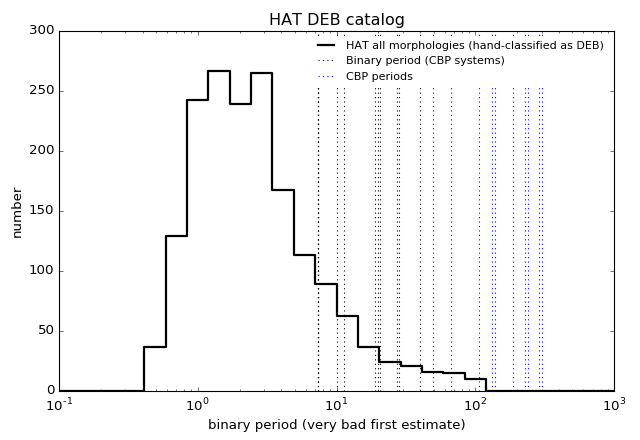

In [12]:
bins = np.logspace(-1,3,27)

allvals, binedge = np.histogram(debperiods, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='HAT all morphologies (hand-classified as DEB)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(cbps['P_p'], ylims[0], ylims[1], color='b', linestyles=':', label='CBP periods')

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period (very bad first estimate)', ylabel='number', title='HAT DEB catalog')
f.tight_layout()
f.savefig('plots/hat_deb_period_histogram_smallbins.pdf')
f.tight_layout()
f.show()

<IPython.core.display.Javascript object>


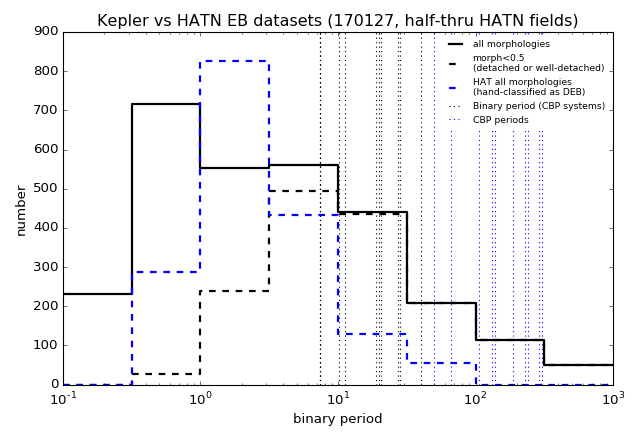

In [19]:
keb_path = '../data/kepler_eb_catalog_v3.csv'
cols = 'KIC,period,period_err,bjd0,bjd0_err,morph,GLon,GLat,kmag,Teff,SC'
cols = tuple(cols.split(','))

tab = ascii.read(keb_path)
currentcols = tab.colnames
for ix, col in enumerate(cols):
    tab.rename_column(currentcols[ix], col)
tab.remove_column('col12') # remnant of import

#KEPLER
bins = np.logspace(-1,3,9)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

detachedvals, binedge = np.histogram(tab[tab['morph']<0.5]['period'], bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps--', lw=2, c='k', label='morph<0.5\n(detached or well-detached)')

#HATN
allvals, binedge = np.histogram(debperiods, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])
ax.semilogx(bins, allvals, ls='steps--', lw=2, c='b', label='HAT all morphologies\n(hand-classified as DEB)')


ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(cbps['P_p'], ylims[0], ylims[1], color='b', linestyles=':', label='CBP periods')

leg = ax.legend(loc='best', fontsize='x-small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period', ylabel='number', title='Kepler vs HATN EB datasets (170127, half-thru HATN fields)')
f.tight_layout()
f.savefig('plots/compare_eb_period_histogram_bigbins.pdf')
f.show()

<IPython.core.display.Javascript object>


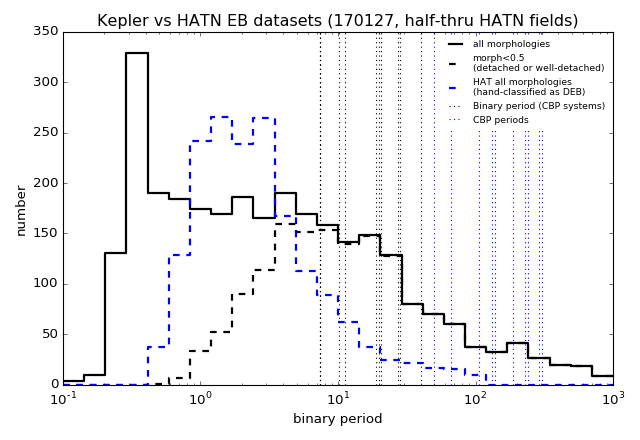

In [25]:
keb_path = '../data/kepler_eb_catalog_v3.csv'
cols = 'KIC,period,period_err,bjd0,bjd0_err,morph,GLon,GLat,kmag,Teff,SC'
cols = tuple(cols.split(','))

tab = ascii.read(keb_path)
currentcols = tab.colnames
for ix, col in enumerate(cols):
    tab.rename_column(currentcols[ix], col)
tab.remove_column('col12') # remnant of import

#KEPLER
bins = np.logspace(-1,3,27)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

detachedvals, binedge = np.histogram(tab[tab['morph']<0.5]['period'], bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps--', lw=2, c='k', label='morph<0.5\n(detached or well-detached)')

#HATN
allvals, binedge = np.histogram(debperiods, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])
ax.semilogx(bins, allvals, ls='steps--', lw=2, c='b', label='HAT all morphologies\n(hand-classified as DEB)')


ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(cbps['P_p'], ylims[0], ylims[1], color='b', linestyles=':', label='CBP periods')

leg = ax.legend(loc='best', fontsize='x-small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period', ylabel='number', title='Kepler vs HATN EB datasets (170127, half-thru HATN fields)')
f.tight_layout()
f.savefig('plots/compare_eb_period_histogram_smallbins.pdf')
f.show()

OK, what about the lengths?

In [22]:
meannpts = np.mean(np.array(deblengths))
meanlendays = meannpts*4. / 60. / 24.

In [23]:
meanlendays

31.12711220169361

In [24]:
meanlendays * 1730

53849.904108929943

We want to overplot where known Kepler EBs are.

Then OOM: what is the total "size" of the detached EB dataset?

Note it's mostly 30 minute ("long") cadence for these targets. (I think).
If not, it's 1 minute ("short") cadence.

In [17]:
points_per_hr = 2
points_per_d = points_per_hr * 24.
points_per_yr = points_per_d * 365.25
points_tot = points_per_yr * 4
days_tot_obsd = 4*365.25

In [18]:
points_tot

70128.0

In [19]:
days_tot_obsd

1461.0

Kepler dataset: 1461 days of continuous observation, for 1571 detached EBs.                               

In [20]:
print('{:.4g} detached EB days of data'.format(1461*1571))

2.295e+06 detached EB days of data
